In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

### Reading in the data about wine preferences

In [2]:
wine_quality_data = pd.read_csv("winequality-red.csv", sep=';')

In [3]:
wine_quality_data.shape

(1599, 12)

In [4]:
wine_quality_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_quality_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Train/Test Split 

In [6]:
X = wine_quality_data.iloc[:,:-1]

In [7]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
y = wine_quality_data.iloc[:,-1:]

In [9]:
y.head(5)

,quality
0,5
1,5
2,5
3,6
4,5


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Development

#### Ordinary Least Squares

In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Perform Cross Validation

In [12]:
cv_values = [i for i in range(2,11)]
accuracy_values_mse = []

In [13]:
for i in cv_values:
    accuracy_mse = -cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv = i).mean()
    accuracy_values_mse.append(accuracy_mse)

Show plot of k number of folds and accuracy values

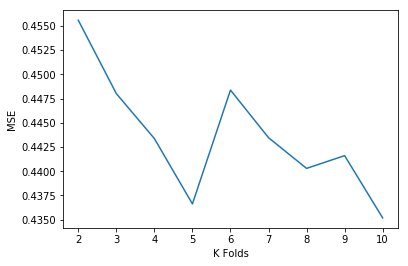

In [14]:
plt.plot(cv_values, accuracy_values_mse)
plt.xlabel("K Folds")
plt.ylabel("MSE")
plt.show()

Print out the coefficients of the linear regression model corresponding to each of the features, along with the intercept term.

In [15]:
for id_value, column_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(column_name, lr_model.coef_[0][id_value]))

lr_intercept = lr_model.intercept_[0]
print("The intercept term for our model is {}".format(lr_intercept))

The coefficient for fixed acidity is 0.023085333909279103
The coefficient for volatile acidity is -1.0013044340678174
The coefficient for citric acid is -0.14082146122412922
The coefficient for residual sugar is 0.0065643110414779346
The coefficient for chlorides is -1.8065031490473662
The coefficient for free sulfur dioxide is 0.005627334387083055
The coefficient for total sulfur dioxide is -0.0036444489338687603
The coefficient for density is -10.351593588833333
The coefficient for pH is -0.3936877323398524
The coefficient for sulphates is 0.8411716226093248
The coefficient for alcohol is 0.2818895674091875
The intercept term for our model is 14.355105195764843


In [16]:
print("The minimum mse value for ols is: " + str(min(accuracy_values_mse)))

The minimum mse value for ols is: 0.43518490403009247


#### Ridge Regression 

Perform repeated k-fold cross validation 

In [17]:
mse_values = [0, 0, 0, 0, 0]
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
num_iterations = 0

In [18]:
kf = RepeatedKFold(n_splits = 10, n_repeats = 10) 

for train_index, test_index in kf.split(X):
    X_train_indexed, X_test_indexed = X.iloc[train_index, :], X.iloc[test_index, :] 
    y_train_indexed, y_test_indexed = y.iloc[train_index, :], y.iloc[test_index, :]
        
    for i in range(5):
        alpha = alphas[i]
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_indexed, y_train_indexed)
        y_predicted = ridge_model.predict(X_test_indexed)
        mse = mean_squared_error(y_test_indexed, y_predicted)
        mse_values[i] += mse
        
    num_iterations += 1 

In [19]:
avg_mse_values = [mse_value / num_iterations for mse_value in mse_values]

Create a plot of the alpha (tuning parameter) and average mean squared error values

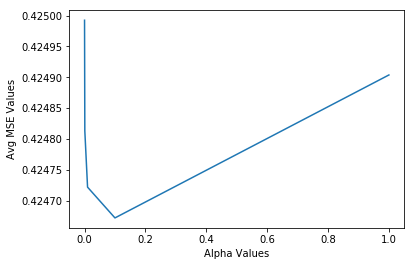

In [20]:
plt.plot(alphas, avg_mse_values)
plt.xlabel("Alpha Values")
plt.ylabel("Avg MSE Values")
plt.show()

Find the optimal alpha (tuning parameter) value and use it to build a ridge regression model.

In [21]:
min_avg_mse_value = min(avg_mse_values)
min_error_index = avg_mse_values.index(min_avg_mse_value)
alpha = alphas[min_error_index]

In [22]:
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_predicted = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)

Specify the ridge regression model coefficients and intercept

In [23]:
coefficients = pd.DataFrame({"Features":X.columns,"Coefficients":np.transpose(ridge_model.coef_[0])})
coefficients.head(11)

,Features,Coefficients
0,fixed acidity,0.014517
1,volatile acidity,-1.012339
2,citric acid,-0.146866
3,residual sugar,0.002027
4,chlorides,-1.735658
5,free sulfur dioxide,0.005721
6,total sulfur dioxide,-0.003657
7,density,-0.079639
8,pH,-0.436087
9,sulphates,0.816781


In [24]:
intercept = pd.DataFrame({"Intercept": ridge_model.intercept_})
intercept.head()

,Intercept
0,4.249021


Specify the minimum cross validation error

In [25]:
print("The minimum average cross validation mse is: " + str(min_avg_mse_value))

The minimum average cross validation mse is: 0.4246719328182429


#### Lasso Regression 

Perform repeated k-fold cross validation 

In [26]:
mse_values = [0, 0, 0, 0, 0]
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
num_iterations = 0

In [27]:
kf = RepeatedKFold(n_splits = 10, n_repeats = 10) 

for train_index, test_index in kf.split(X):
    X_train_indexed, X_test_indexed = X.iloc[train_index, :], X.iloc[test_index, :] 
    y_train_indexed, y_test_indexed = y.iloc[train_index, :], y.iloc[test_index, :]
        
    for i in range(5):
        alpha = alphas[i]
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train_indexed, y_train_indexed)
        y_predicted = lasso_model.predict(X_test_indexed)
        mse = mean_squared_error(y_test_indexed, y_predicted)
        mse_values[i] += mse
        
    num_iterations += 1 

In [28]:
avg_mse_values = [mse_value / num_iterations for mse_value in mse_values]

Create a plot of the alpha (tuning parameter) and average mean squared error values

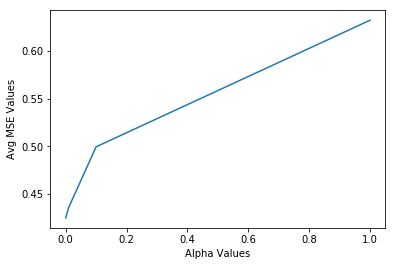

In [29]:
plt.plot(alphas, avg_mse_values)
plt.xlabel("Alpha Values")
plt.ylabel("Avg MSE Values")
plt.show()

Find the optimal alpha (tuning parameter) value and use it to build a lasso regression model.

In [30]:
min_avg_mse_value = min(avg_mse_values)
min_error_index = avg_mse_values.index(min_avg_mse_value)
alpha = alphas[min_error_index]

In [31]:
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_predicted = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)

Specify the lasso regression model coefficients and intercept

In [32]:
coefficients = pd.DataFrame({"Features":X.columns,"Coefficients":np.transpose(lasso_model.coef_[0])})
coefficients.head(11)

,Features,Coefficients
0,fixed acidity,0.013953
1,volatile acidity,0.013953
2,citric acid,0.013953
3,residual sugar,0.013953
4,chlorides,0.013953
5,free sulfur dioxide,0.013953
6,total sulfur dioxide,0.013953
7,density,0.013953
8,pH,0.013953
9,sulphates,0.013953


In [33]:
intercept = pd.DataFrame({"Intercept": lasso_model.intercept_})
intercept.head()

,Intercept
0,4.163343


Specify the minimum cross validation error

In [34]:
print("The minimum average cross validation mse is: " + str(min_avg_mse_value))

The minimum average cross validation mse is: 0.42491066451983206


#### Elastic Net

Perform repeated k-fold cross validation 

In [35]:
mse_values = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
ratios = [0.2, 0.4, 0.6, 0.8, 1.0]
num_iterations = 0

In [36]:
kf = RepeatedKFold(n_splits = 10, n_repeats = 10) 

for train_index, test_index in kf.split(X):
    X_train_indexed, X_test_indexed = X.iloc[train_index, :], X.iloc[test_index, :] 
    y_train_indexed, y_test_indexed = y.iloc[train_index, :], y.iloc[test_index, :]
        
    for i in range(5):
        alpha = alphas[i]
        for j in range(5):
            ratio = ratios[j]
            elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=ratio)
            elastic_net_model.fit(X_train_indexed, y_train_indexed)
            y_predicted = elastic_net_model.predict(X_test_indexed)
            mse = mean_squared_error(y_test_indexed, y_predicted)
            mse_values[i][j] += mse
            num_iterations += 1 

In [37]:
avg_mse_values = [mse_value / num_iterations for mse_value_array in mse_values for mse_value in mse_value_array]

Create a plot of the alpha and l1_ratio (tuning parameters) and average mean squared error values

In [38]:
print(avg_mse_values)

[0.016997942416315717, 0.016998189361100223, 0.016998450227699847, 0.01699873982050371, 0.016999056299432342, 0.017024256119224184, 0.01702660075985282, 0.017029355454885278, 0.01703249650813154, 0.017035778082767013, 0.017325910060408744, 0.017373185322344442, 0.017387701929380456, 0.01740949731946985, 0.017440247655287455, 0.01900360166096478, 0.019586396027680045, 0.019688180480933883, 0.01981779864210686, 0.0199795805993513, 0.022735024044205916, 0.02520520482272836, 0.025266918431463843, 0.025275283160936517, 0.025288100441754766]


In [39]:
print(alphas)

[0.0001, 0.001, 0.01, 0.1, 1.0]


In [40]:
print(ratios)

[0.2, 0.4, 0.6, 0.8, 1.0]


In [41]:
x_values = alphas * 5
y_values = ratios * 5
z_values = avg_mse_values

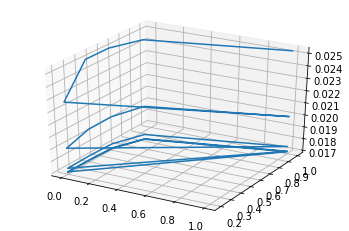

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs = x_values, ys = y_values, zs = z_values) 

Find the optimal alpha and alpha and l1_ratio (tuning parameters) values and use it to build a elastic net model.

In [43]:
min_avg_mse_value = min(avg_mse_values)
min_error_index = avg_mse_values.index(min_avg_mse_value)
alpha = alphas[min_error_index]
l1_ratio = ratios[min_error_index]

In [44]:
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net_model.fit(X_train_indexed, y_train_indexed)
y_predicted = elastic_net_model.predict(X_test_indexed)
mse = mean_squared_error(y_test_indexed, y_predicted)

Specify the elastic net model coefficients and intercept

In [45]:
coefficients = pd.DataFrame({"Features":X.columns,"Coefficients":np.transpose(elastic_net_model.coef_[0])})
coefficients.head(11)

,Features,Coefficients
0,fixed acidity,0.015212
1,volatile acidity,0.015212
2,citric acid,0.015212
3,residual sugar,0.015212
4,chlorides,0.015212
5,free sulfur dioxide,0.015212
6,total sulfur dioxide,0.015212
7,density,0.015212
8,pH,0.015212
9,sulphates,0.015212


In [46]:
intercept = pd.DataFrame({"Intercept": elastic_net_model.intercept_})
intercept.head()

,Intercept
0,4.241787
